In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import lagrange

## Solve SEIR model

In [2]:
def derive(x, t, R0, T, tau):
    b = R0 / tau
    S, E, I, R = x[0], x[1], x[2], x[3]
    N = S+E+I+R

    Sd = -b*S*I/N
    Ed = b*S*I/N - (1/T)*E
    Id = (1/T)*E - (1/tau)*I
    Rd = (1/tau)*I
    

    xdot=[Sd, Ed, Id, Rd]
    return np.array(xdot)

In [3]:
def SEIR_model(tau):
    N = 1e5
    R0=2.2
    T=9
    
    # initial state
    E=0
    I=10
    R=0
    S=N-E-I-R

    Tend=500
    dt=0.01
    count = Tend/dt
    Nt=int(count)
    t = np.arange(0, Nt, 1)

    x = [S, E, I, R]

    Xoutput = odeint(derive, x, t, args=(R0,T,tau))

    return Xoutput

## Select Clenshaw-Curtis nodes and compute the corresponding I_max value

In [4]:
# this script integrates the SEIR model M times
# with tau distributed according to Clenshaw-Curtis nodes.

# ls will be the list of Q-values.
ls = [];

M = 14;
# Curtis-clenshaw nodes (cos(i*pi/M)):
tt = np.linspace(0,M,M);
# Rescale to [1,14]
x = np.cos(tt*np.pi/M) * 6.5
x[:] = x[:] + 7.5

Q = np.zeros(M)

for n in range(M):

    #tau=1.0+13*betarnd(2,2,1,1)
    tau = x[n]
    #print(tau)
    #SEIRmodel is the given file (unchanged)
    Xoutput = SEIR_model(tau)

    Q[n] = max(Xoutput[:,2]) # maximum of timeseries of I
    ls = [ls, Q]
    #print(Q)


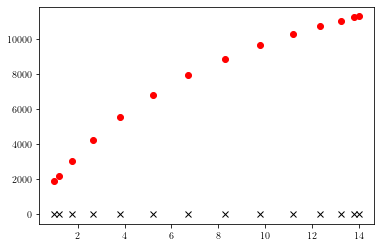

In [8]:
plt.plot(x, Q, 'or')
plt.plot(x,-0.5*np.ones(np.size(x)),'xk')

plt.show()

## Lagrange interpolation

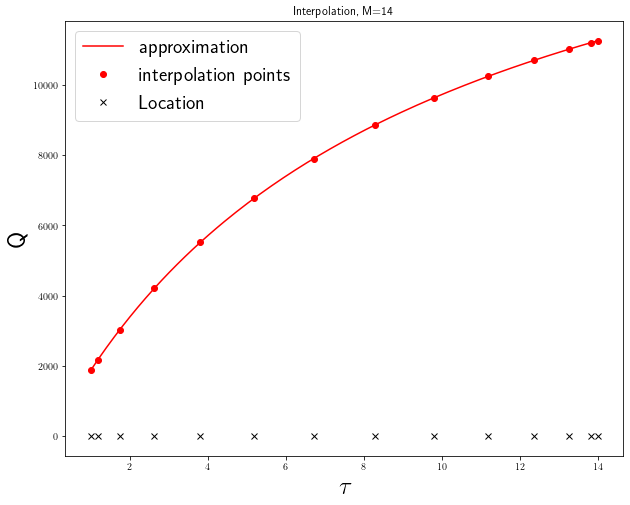

In [15]:
# Create grid from 1 to 14, with steps of 0.1
# for interpolation. Can increase to smoothen curve.
dz=0.1
z=np.linspace(1, 14, num=130)
J=len(z)-1;

# fa will be approximated function
fa=np.zeros(np.size(z));

qi=lagrange(x,Q)
#print(qi)

fa=qi(z)
#print(fa)

fa_mean = np.mean(fa)
fa_std = np.std(fa)

# create figure for approximated function, with interpolated nodes
# and their x-axis value visible.

plt.plot(z,fa,'-r',label='approximation')
plt.plot(x,Q,'or', label='interpolation points')
plt.plot(x,-0.5*np.ones(np.size(x)),'xk',label='Location', linewidth=2)
plt.legend(prop={'size': 20})
plt.xlabel(r'$\tau$', fontsize=25)
plt.ylabel('Q', fontsize=25)
plt.title('Interpolation, M=14')

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()
